#***The Birthday Paradox***

**The birthday paradox**, also known as the birthday problem, states that in a random group of 23 people, there is about a 50 percent chance that two people have the same birthday. There are multiple reasons why this seems like a paradox. One is that when in a room with 22 other people, if a person compares his or her birthday with the birthdays of the other people it would make for only 22 comparisons—only 22 chances for people to share the same birthday.



Today we will work on this sole *paradoxal* problem to prove how right it actually is.


##**The mathematical approach :**

In a group of 23 persons, each one will be compared to 22 other persons, which means that we will be having exactly $\displaystyle\sum_{i=1}^{i=22}i$ comparaisons.

And $$\displaystyle \sum_{i=1}^{i=22} = \dfrac{22\times23}{2}=253$$
Which means, that in a group of 23 persons, we have 253 combinations.

We know that a person's birthday is one out of 365 probabilities (29 Feb excluded), this leads to the point that there is a $\dfrac{364}{365}$ possibility that each person doesn't share the same birthday with another, because there are 364 days that aren't a person's birthday.

And since we have 253 of couples combinaisons in a 23 persons group, then there is a $\left(\frac{364}{365}\right)^{253}$ probability that two persons doesn't have the same birthday.

Now, let $A$ be the event of 'two persons don't have the same birthday', then $\overline{A}$ is the event 'two persons have the same birthday.

And we all know that $P(\overline{A}) = 1 - P(A) $

Which gives the following result : $ P(\overline{A}) =1 - \left(\frac{364}{365}\right)^{253} = 0.50047715403$

#**The experimental approach :**
Using python programming language, we can do thousands of experiments at once.

First we import the needed libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files #(optional)

First we create a function to generate random birthdays :

In [3]:
def generate_birthdays(num_simulations, num_people):
    """Generate all birthdays for all simulations at once."""
    return np.random.randint(1, 366, size=(num_simulations, num_people))


Then, we create a function to check if there is any duplicated birthday in the set of people's birthdays :

In [4]:
def check_for_duplicates(birthdays, num_people):
    """Check for duplicates in each simulation."""
    return np.apply_along_axis(lambda x: np.unique(x).size < num_people, axis=1, arr=birthdays)

After it, we can calculate the probability in search :

In [5]:
def calculate_probability(has_duplicates):
    """Calculate the probability as the fraction of simulations with duplicates."""
    return np.mean(has_duplicates)

A function to simulate the whole proccess :

In [6]:
def birthday_paradox_simulation(num_simulations, num_people):
    """Simulate the birthday paradox multiple times and calculate the probability."""
    birthdays = generate_birthdays(num_simulations, num_people)
    has_duplicates = check_for_duplicates(birthdays, num_people)
    probability = calculate_probability(has_duplicates)
    return probability

We create our variables, number of simulations, and a list of groups which sizes are going to be 5, 6, 7 up to 100, and a variable to save the results of each group.

In [7]:
num_simulations = 100000 #you can choose any number you want, the higher the number
# the slower the running proccess is going to be
num_people_range = range(5, 80) #we will experiment on groups of sizes from 5 to 800
probabilities = []

Using a for loop, to loop into each group, we do our simulation and save the result :

In [8]:
for num_people in num_people_range:
        probability = birthday_paradox_simulation(num_simulations, num_people)
        probabilities.append(probability)

We save our results into a dataframe, and then save it into a .csv file, this is optional of course.

In [9]:
df = pd.DataFrame({'NumPeople': num_people_range, 'Probability': probabilities})
df.to_csv("birthday_probabilities.csv", index=False)

And then we plot the results :

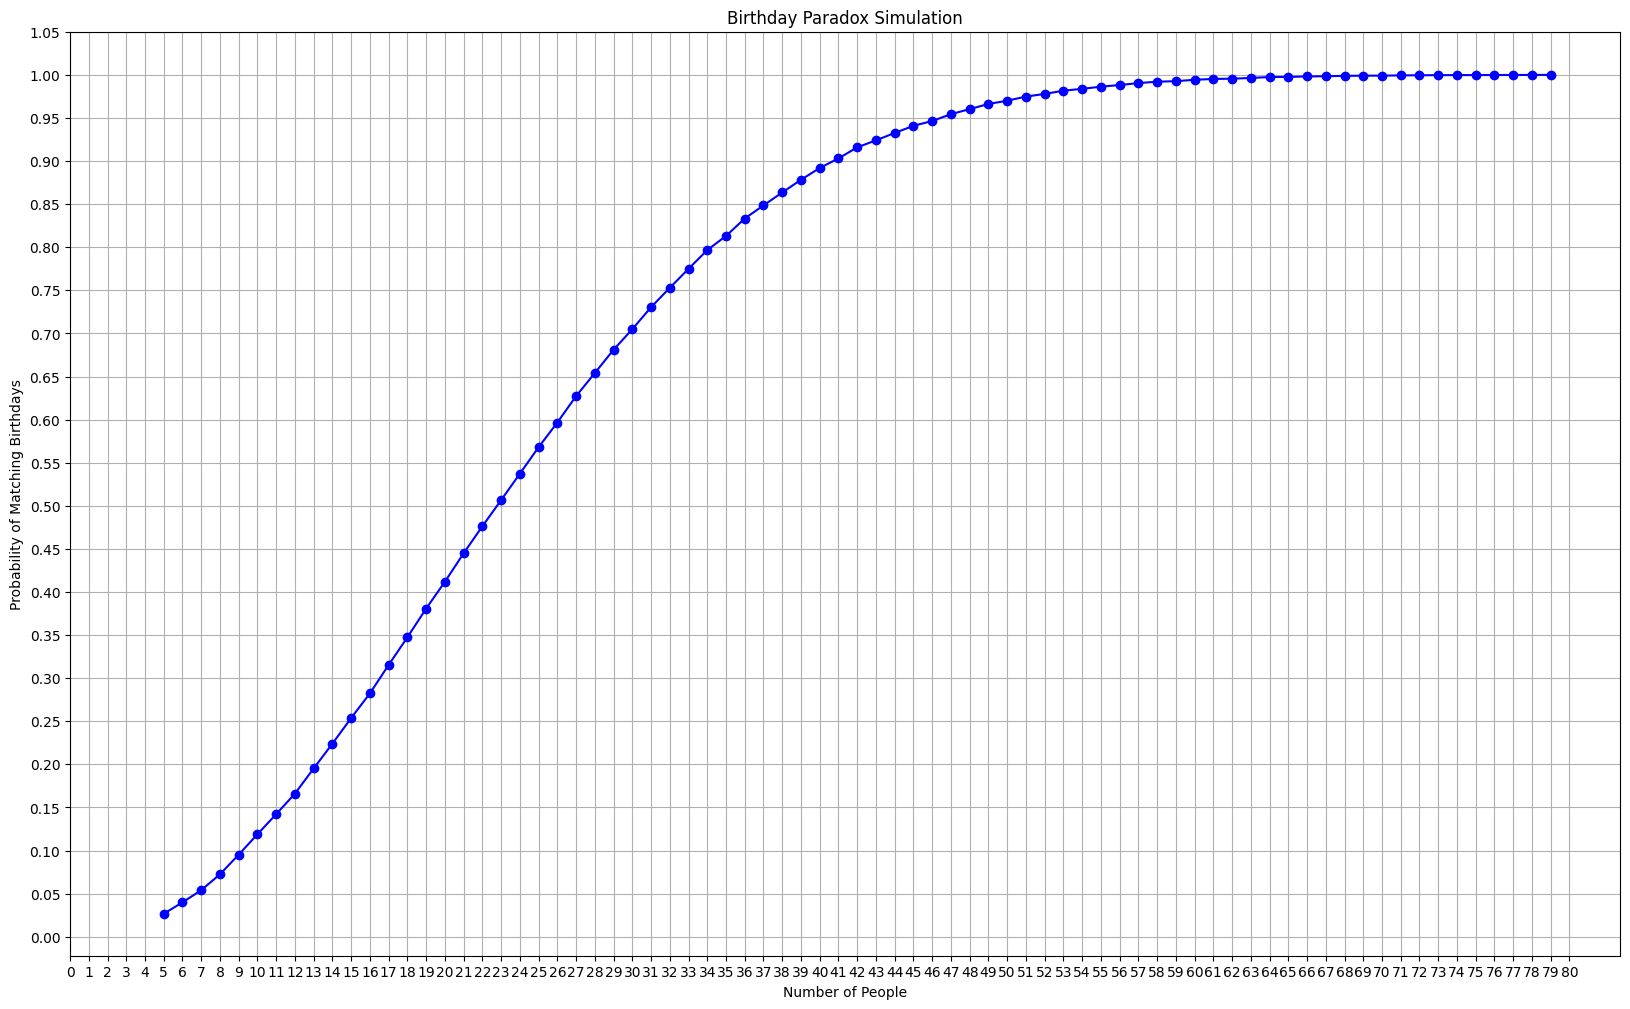

In [15]:
#Set the size of the figure
plt.figure(figsize=(20, 12))
#Set the ploting pramaeters
plt.plot(num_people_range, probabilities, marker='o', linestyle='-', color='b')
#Set the title of the plot
plt.title("Birthday Paradox Simulation")
#Set the x and y axises labels
plt.xlabel("Number of People")
plt.ylabel("Probability of Matching Birthdays")
# Set y-axis tick locations manually from 0 to 1 with a step of 0.05
plt.yticks(np.arange(0, 1.1, 0.05))
# Set x-axis tick locations to cover 0 and 80 numbers
plt.xticks(np.arange(0, 81, 1))
#Set the grid
plt.grid(True)
#Save the figure
plt.savefig("birthday_probabilities.png")
plt.show()

And just in case you want to upload your .csv and .png files :

In [16]:
files.download('birthday_probabilities.csv')
files.download('birthday_probabilities.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#**Result**



If you are in a group of 23 persons (or more), always remember that there is a 50-50 chance that someone else there has sthe same birthday as you.